<a href="https://colab.research.google.com/github/mathispuissant/StatApp/blob/main/Cluster_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import loads 
import seaborn as sns

import sys, os



In [7]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import loads 

Wall time: 0 ns


In [10]:
velib_nombre = pd.read_csv(r"C:\Users\mathi\Dropbox\Mon PC (DESKTOP-R6PDP2U)\Desktop\Projet info\donnees\velib_sec.csv", sep =",")
velib_nombre = velib_nombre.set_index("station_id")

In [11]:
velib_nombre.head()

,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,10/19/20;18:26:53,10/19/20;18:31:53,10/19/20;18:36:53,10/19/20;18:41:54,10/19/20;18:46:54,...,02/15/21;21:13:34,02/15/21;21:18:35,02/15/21;21:23:35,02/15/21;21:28:35,02/15/21;21:33:36,02/15/21;21:38:36,02/15/21;21:43:36,02/15/21;21:48:36,02/15/21;21:53:37,02/15/21;21:58:37
station_id,,,,,,,,,,,,,,,,,,,,,
213688169,2,2,2,3,3,3,1,1,1,2,...,4,4,4,4,4,5,5,5,5,5
99950133,46,46,47,49,46,44,43,43,45,43,...,24,24,24,24,24,24,24,24,24,24
516709288,1,1,1,2,2,2,3,1,1,1,...,3,3,3,3,3,3,3,5,4,4
36255,0,0,0,0,2,4,4,4,4,4,...,8,8,8,8,9,9,10,10,9,9
37815204,5,4,2,2,3,4,5,2,2,4,...,18,18,18,19,19,19,19,20,21,21


In [12]:
velib_nombre=velib_nombre.dropna(axis=0)
velib = velib_nombre.transpose()

In [13]:
import statistics 

In [14]:
def week_days_and_weekend_days(X, Y):
    x = []
    y_weekend = []
    y_week = []

    if not len(X) == len(Y):
        return False

    hours = {"weekend": {}, "weekday": {}}

    for i in range(24):
        hours["weekend"][i] = []
        hours["weekday"][i] = []

    for i in range(len(X)):

        if X[i].weekday() < 5:
            hours["weekday"][X[i].hour].append(Y[i])
        if not X[i].weekday() < 5:
            hours["weekend"][X[i].hour].append(Y[i])


    for i in range(24):
        y_week.append(
np.array(hours["weekday"][i])
        )
        y_weekend.append(
np.array(hours["weekend"][i])
        )
        x.append(i)


    return x, y_week, y_weekend

# Kmean with a normalized and mean centered data

In [196]:
Y = []
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib_nombre.columns]
list_velib_wo_bike = []
list_velib = []


for i,k in enumerate(velib.columns):


    if i % 200 == 0:
        print(int(100 * i / len(velib.columns)))



    y_week_mean = []
    y_weekend_mean = []
    y = list(velib[k]) 

    x, y_week, y_weekend = week_days_and_weekend_days(X, y)

    

    for j in range(len(y_week)):     
        y_week_mean.append(np.mean(y_week[j]))
        y_weekend_mean.append(np.mean(y_weekend[j]))

    # normalizing and mean centering
    y_week_mean -= np.mean(y_week_mean)
    y_weekend_mean -= np.mean(y_weekend_mean)

    if np.max(np.abs(y_week_mean)) == 0:
        list_velib_wo_bike.append(k)

    else:
        Y.append([
            y_week_mean / np.max(np.abs(y_week_mean)),
            y_weekend_mean / np.max(np.abs(y_weekend_mean))
        ])
        list_velib.append(k)


0
ipykernel_launcher:37: RuntimeWarning: invalid value encountered in true_divide
14
28
42
57
71
85


In [16]:
list_velib_wo_bike

[2254322638,
 213936755,
 2515618216,
 54000614,
 1057319366,
 1057383154,
 653085678,
 1063971944,
 1074347188,
 1074352578,
 6297,
 653159330,
 1057387136,
 213699079,
 54000623]

## cluster en folie

In [93]:
Y[0][0]

array([0.40986258, 0.51340095])

In [24]:
nb_clusters= [2,4]

In [130]:
from tslearn.clustering import TimeSeriesKMeans

clusters_Kmeans = {}
for i in range(*nb_clusters):
    clusters_Kmeans[i] = []
    clusters_Kmeans[i].append(TimeSeriesKMeans(n_clusters= i, metric="dtw", max_iter=10, n_init= 10, random_state=5).fit(Y))
    clusters_Kmeans[i].append(clusters_Kmeans[i][0].predict(Y))
    print(i)


2
3


In [138]:
for i in range(*nb_clusters):

    clusters_Kmeans[i].append( {"type de cluster": [], "heure": [], "week":[], "value":[],"index":[]})
    

    for index in range(len(clusters_Kmeans[i][1])):
        
        num_cluster = clusters_Kmeans[i][1][index]  

        for heure, x in enumerate(np.transpose(Y[index])):

            #weekend
            clusters_Kmeans[i][2]["type de cluster"].append(num_cluster)
            clusters_Kmeans[i][2]["heure"].append(heure)
            clusters_Kmeans[i][2]["week"].append("weekend")
            clusters_Kmeans[i][2]["value"].append(x[1])
            clusters_Kmeans[i][2]["index"].append(list_velib[index])

            #week
            clusters_Kmeans[i][2]["type de cluster"].append(num_cluster)
            clusters_Kmeans[i][2]["heure"].append(heure)
            clusters_Kmeans[i][2]["week"].append("week")
            clusters_Kmeans[i][2]["value"].append(x[0])
            clusters_Kmeans[i][2]["index"].append(list_velib[index])



        

In [139]:
Cluster_2 = pd.DataFrame(clusters_Kmeans[2][2])
Cluster_3 = pd.DataFrame(clusters_Kmeans[3][2])
    


### plot

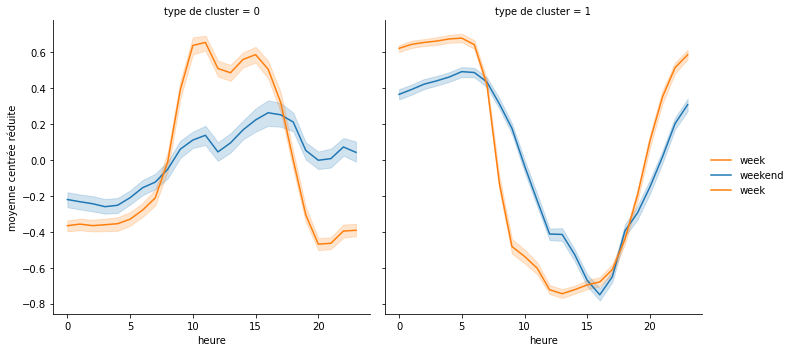

In [160]:
import seaborn as sns

Cluster_2["moyenne centrée réduite"] = Cluster_2["value"]
sns.relplot(x="heure", y="moyenne centrée réduite",
             hue="week", ci=99, kind="line",
             data=Cluster_2, col="type de cluster"
             )

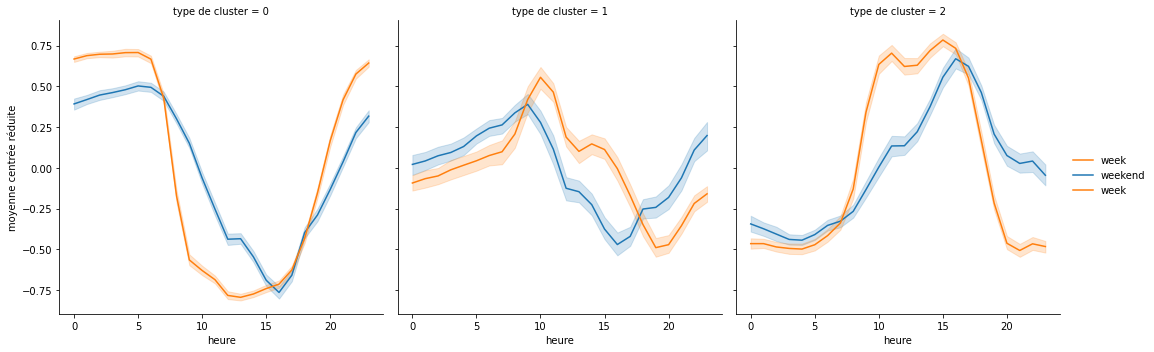

In [159]:
Cluster_3["moyenne centrée réduite"] = Cluster_3["value"]
sns.relplot(x="heure", y="moyenne centrée réduite",
             hue="week", ci=99, kind="line",
             data=Cluster_3, col="type de cluster"
             )

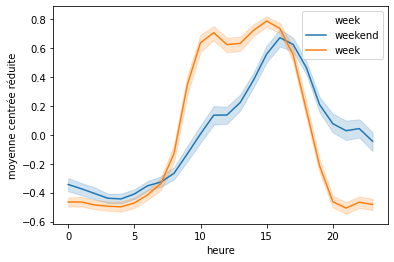

In [152]:
sns.lineplot(x="heure", y="moyenne centrée réduite",
             hue="week",  ci=99,
             data=Cluster_3[Cluster_3["type de cluster"]==2]
             )

In [161]:
list_inertia = []
for j in range(*nb_clusters):
    list_inertia.append(clusters_Kmeans[j][0].inertia_)

In [162]:
list_inertia

[6.963462762497784, 5.856893682416085]

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7]

Text(0, 0.5, 'inertie')

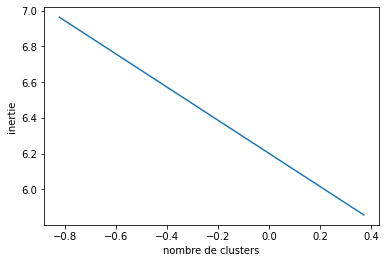

In [163]:
plt.plot(x, list_inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("inertie")

In [200]:
Cluster_df = pd.DataFrame([clusters_Kmeans[2][1], clusters_Kmeans[3][1], list_velib]).transpose()


In [206]:
Cluster_df = Cluster_df.rename(columns={0 : "2 cluster", 1 : "2 cluster", 2: "station_id"})

In [166]:
import urllib.request
import json
from pandas.io.json import json_normalize

In [167]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info.head()

,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
1,99950133,André Mazet - Saint-André des Arts,48.853756,2.339096,55,6015,[CREDITCARD]
2,516709288,Charonne - Robert et Sonia Delauney,48.855908,2.392571,20,11104,NaN
3,36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
4,37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN


In [207]:
df_id_name_capacity = df_station_info[["station_id", "lat", "lon", "name", "capacity"]]

df = df_id_name_capacity.merge(Cluster_df, how = "inner", left_on = "station_id", right_on = "station_id")


In [208]:
df

,station_id,lat,lon,name,capacity,2 cluster,2 cluster
0,213688169,48.865983,2.275725,Benjamin Godard - Victor Hugo,35,1,0
1,99950133,48.853756,2.339096,André Mazet - Saint-André des Arts,55,0,2
2,516709288,48.855908,2.392571,Charonne - Robert et Sonia Delauney,20,1,0
3,36255,48.879296,2.337360,Toudouze - Clauzel,21,1,0
4,37815204,48.840855,2.387555,Mairie du 12ème,30,1,0
...,...,...,...,...,...,...,...
1377,101013666,48.841795,2.376785,Bercy - Villot,34,0,2
1378,394404659,48.875674,2.326560,Gare Saint-Lazare - Cour du Havre,45,0,2
1379,34742973,48.836396,2.278419,Place Balard,22,0,2
1380,478732841,48.861818,2.350138,Sebastopol - Rambuteau,16,0,2


In [192]:
[int(value) for value in list_velib_wo_bike]

[2254322638,
 213936755,
 2515618216,
 54000614,
 1057319366,
 1057383154,
 653085678,
 1063971944,
 1074347188,
 1074352578,
 6297,
 653159330,
 1057387136,
 213699079,
 54000623]